In [61]:
from keras.datasets import mnist
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as pl


In [62]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data ()

In [63]:
print('Training data:',train_images.shape,train_labels.shape)
print('Testing data:',test_images.shape,test_labels.shape)

Training data: (60000, 28, 28) (60000,)
Testing data: (10000, 28, 28) (10000,)


In [64]:
print(train_labels[0:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [65]:
#unique numbers from the train labels
total_classes = np.unique(train_labels)
number_of_total_classes = len(total_classes)
print("Total number of output classes:",number_of_total_classes)
print("All output classes:",total_classes)


Total number of output classes: 10
All output classes: [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'label:7')

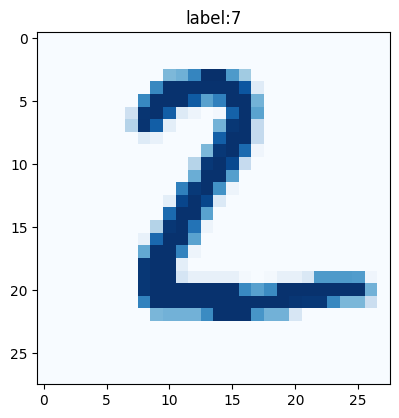

In [66]:
#displaying the first image in testing data
plt.figure(figsize=[10,5])
plt.subplot(122)
plt.imshow(test_images[1,:,:],cmap='Blues') # Changed 'camp' to 'cmap'
plt.title("label:{}".format(test_labels[0]))

In [67]:
#change from matrix to array of dimension 28x28 to array of dimension 784
newdimensionData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],newdimensionData)
test_data = test_images.reshape(test_images.shape[0],newdimensionData)
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


**Data Preprocessing**

In [68]:
#change to float datatype
train_data = train_data.astype("float32")
test_data = test_data.astype('float32')

In [69]:
#scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [70]:
#change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [71]:
#display the change for category label using one hot coding
print('origianl label 6:',train_labels[10])
print("After conversion to catgeorical (one-hot):" ,train_labels_one_hot[10])

origianl label 6: 3
After conversion to catgeorical (one-hot): [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


**Model Training**

In [72]:
#Model Training
model = Sequential()
model.add(Dense(512,activation ='relu',input_shape=(newdimensionData,)))
model.add(Dense(512,activation ='relu'))
model.add(Dense(number_of_total_classes,activation='softmax'))

**Model Configuration**

In [73]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
history = model.fit(train_data,train_labels_one_hot,batch_size=256,epochs=10,verbose=1, validation_data =(test_data,test_labels_one_hot))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.4950 - loss: 1.9042 - val_accuracy: 0.8333 - val_loss: 0.8647
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8433 - loss: 0.7607 - val_accuracy: 0.8767 - val_loss: 0.5177
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8772 - loss: 0.5048 - val_accuracy: 0.8922 - val_loss: 0.4162
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8890 - loss: 0.4197 - val_accuracy: 0.9004 - val_loss: 0.3669
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8987 - loss: 0.3733 - val_accuracy: 0.9071 - val_loss: 0.3378
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9018 - loss: 0.3561 - val_accuracy: 0.9119 - val_loss: 0.3186
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9094 - loss: 0.3248 - val_accuracy: 0.9150 - val_loss: 0.3018
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9126 - loss: 0.3131 - val_acc

**Model Evaluation**

In [75]:
[test_loss,test_acc] = model.evaluate(test_data,test_labels_one_hot)
print("Evaluation result: Loss{}.accuracy ={}".format(test_loss,test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9118 - loss: 0.3114
Evaluation result: Loss0.27101343870162964.accuracy =0.9247000217437744


In [76]:
y_pred = model.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [77]:
y_pred_labels =np.argmax(y_pred,axis=1)


In [78]:
y_pred_labels

array([7, 2, 1, ..., 4, 5, 6])

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_labels)
cm

array([[ 959,    0,    0,    2,    0,    4,    9,    1,    5,    0],
       [   0, 1108,    2,    2,    1,    1,    4,    1,   16,    0],
       [  11,    4,  909,   14,   18,    2,   11,   18,   40,    5],
       [   4,    0,   12,  923,    1,   32,    2,   13,   19,    4],
       [   1,    3,    4,    1,  929,    1,    9,    2,    7,   25],
       [  10,    3,    3,   27,    7,  801,   11,    2,   21,    7],
       [  17,    3,    3,    3,   13,   16,  898,    2,    3,    0],
       [   3,   12,   27,    5,    9,    0,    0,  946,    3,   23],
       [   8,    3,    6,   18,    9,   16,   10,   10,  888,    6],
       [  13,    7,    3,    9,   45,   11,    0,   27,    8,  886]])

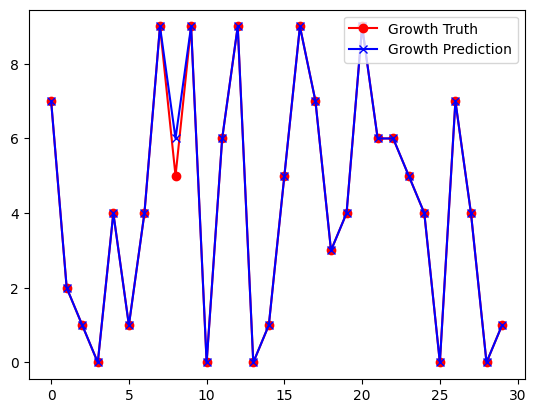

In [80]:
#ploting predicting labels with a blue line
plt.plot(range(len(test_labels))[:30], test_labels[:30], color='r', label='Growth Truth', linestyle='-', marker='o' )
plt.plot(range(len(y_pred_labels))[:30], y_pred_labels[:30], color='b', label='Growth Prediction', linestyle='-', marker='x')
plt.legend()
plt.show()

**CONVERT CODE INTO PYTORCH**

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

**Load and Preprocess Data**

In [82]:
from torchvision import datasets, transforms

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [83]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Flatten input to 784
        self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten input
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

In [84]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [56]:
num_epochs = 5

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/5], Loss: 0.2258
Epoch [2/5], Loss: 0.2050
Epoch [3/5], Loss: 0.1608
Epoch [4/5], Loss: 0.1811
Epoch [5/5], Loss: 0.2635


In [57]:
model.eval()  # Set model to evaluation mode
test_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = correct / total
print(f"Evaluation result on Test Data : Loss = {test_loss/len(test_loader)}, Accuracy = {test_acc}")

Evaluation result on Test Data : Loss = 0.26338933053527286, Accuracy = 0.9237


In [58]:
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Convert lists to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(all_labels, all_preds)
print(cm)


[[ 959    0    2    2    0    7    6    2    2    0]
 [   0 1108    3    2    0    3    4    2   13    0]
 [   9   11  917   15   13    3   14   15   26    9]
 [   2    0   17  915    0   36    2   16   13    9]
 [   1    4    3    1  880    2   10    3    6   72]
 [   9    3    2   23    4  805   10    7   20    9]
 [  13    3    4    1    9   17  908    2    1    0]
 [   2    9   20    6    4    0    0  952    3   32]
 [   7    8    4   20    7   35   11   12  858   12]
 [  11    7    1   10   14    8    1   17    5  935]]


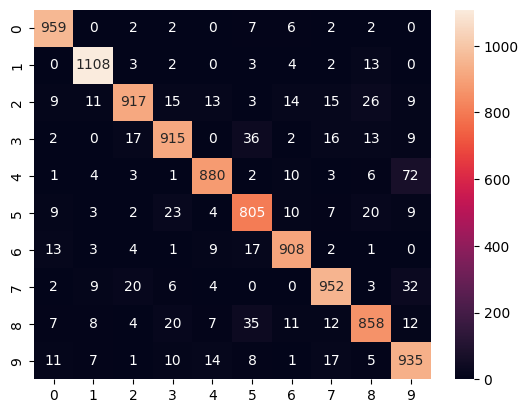

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

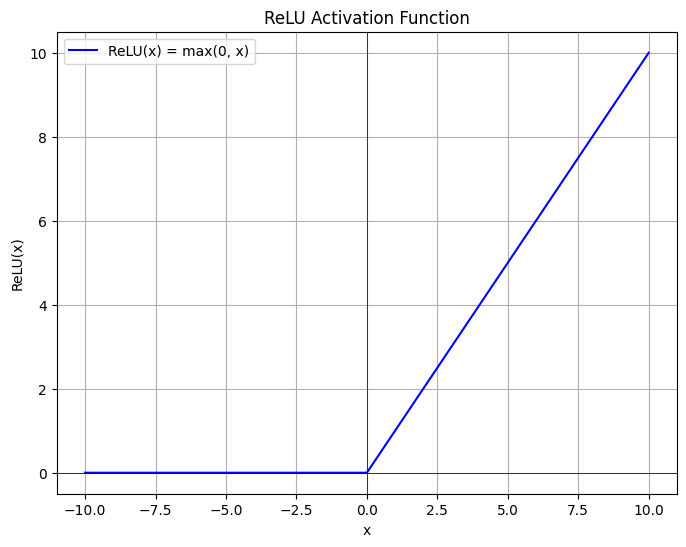

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate input values
x = np.linspace(-10, 10, 400)
y = relu(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='ReLU(x) = max(0, x)', color='b')
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()